In [1]:
# Sam Brown
# sam_brown@mines.edu
# Date: 05/30/2025
# Goal: Determine ratio for each event of impulsive events to non-impulsive events (or some useful metric)

import sys
sys.path.append("/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF")

# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.signal
import math

import my_lib.funcs

# Set path to event files
evts_path = "/Users/sambrown04/Documents/SURF/Events/2010_2010Events2stas"

In [2]:
events_list = my_lib.funcs.load_evt(evts_path)

proc_events = my_lib.funcs.preprocess_events(events_list)

features_list = my_lib.funcs.extract_event_features(events_list)

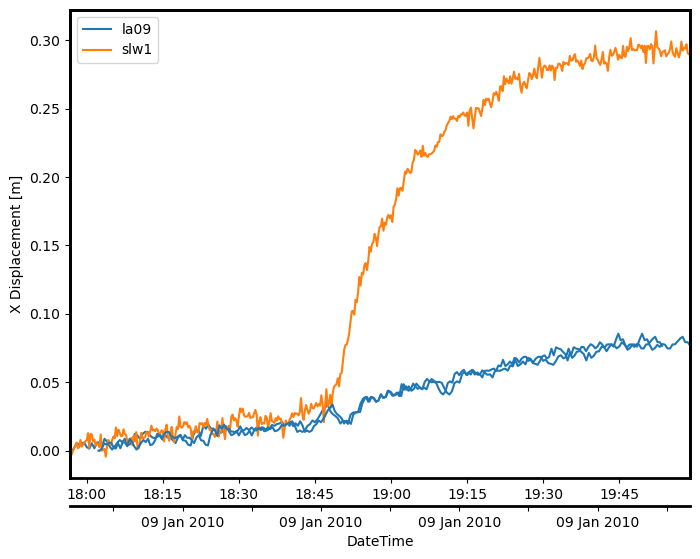

In [13]:
my_lib.funcs.plot_event(events_list[200])

In [11]:
# 9 * 10^-7 is appearing to be a good threshold. 1 * 10^-6 could be good as well

In [12]:
# encode each station to include 1 if slip severity is larger than 9 * 10^-7 and 0 if it is less than
for event in features_list:
    event['impulsiveInd'] = (event['slip_severity'] > 9 * 10 ** -7).astype(int) # Encode the target variable


In [41]:
impulsive_ratios = [0]

for event in features_list:
    num_ones = (event['impulsiveInd'] == 1).sum()
    num_zeros = (event['impulsiveInd'] == 0).sum()

    # print(num_ones, num_zeros)

    total = num_zeros + num_ones

    impulsive_ratios.append(num_ones / total)
        
    

In [51]:
maxi = max(impulsive_ratios)
index = impulsive_ratios.index(maxi)
print(index)

419


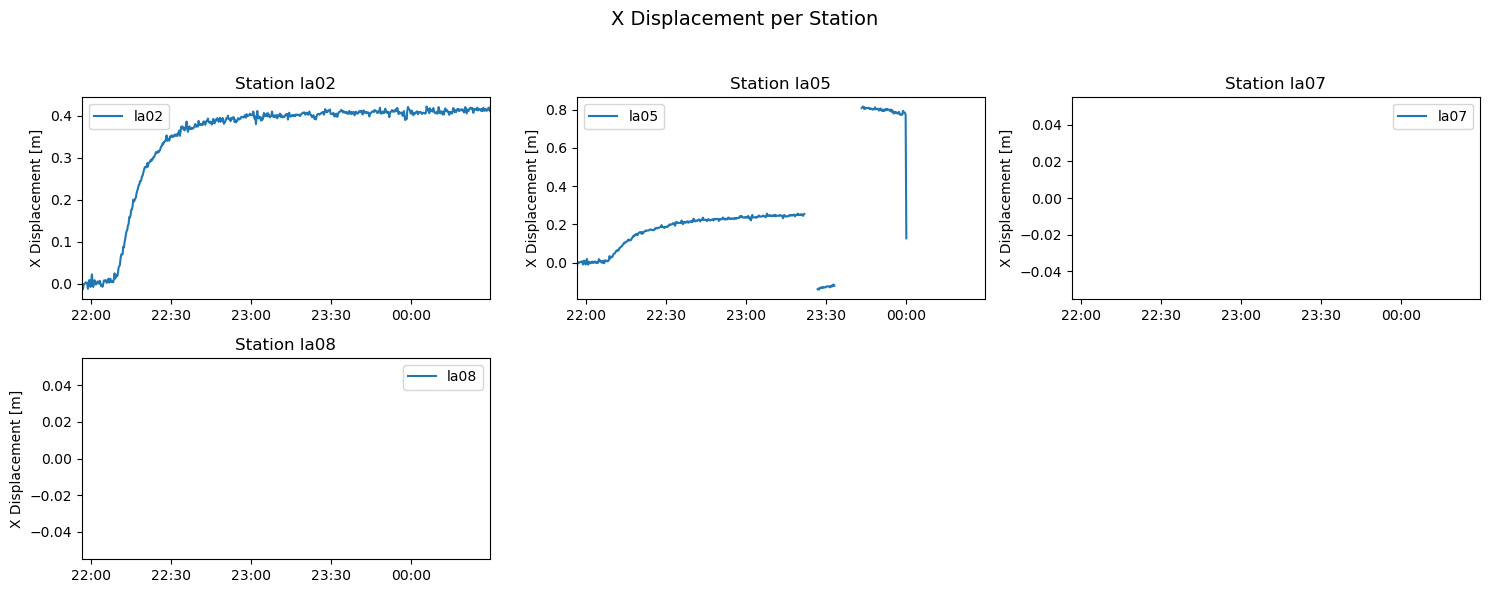

In [63]:
my_lib.funcs.plot_event(events_list[418], True)